<a href="https://colab.research.google.com/github/MengChiehLiu/Entropy-Based-Binning/blob/main/entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Entropy Based Binning Alogorithm
Author: Meng-Chieh, Liu
DateTime: 2022/3/23 13:21
"""

'\nEntropy Based Binning Alogorithm\nAuthor: Meng-Chieh, Liu\nDateTime: 2022/3/23 13:21\n'

In [ ]:
from scipy.stats import entropy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

In [ ]:
class binary_tree:
    def __init__(self):
        self.root = None

    def insert(self, data):
        #判斷tree是否為空
        if self.root == None:
            self.root = Node(data)
        else:
            self._insert(data, self.root)
    
    def _insert(self, data, cur_node):
        if data[0][0]+data[-1][0] < cur_node.data[0][0]+cur_node.data[-1][0]:
            if cur_node.left == None:
                cur_node.left = Node(data)
            else:
                self._insert(data, cur_node.left)
        elif data[0][0]+data[-1][0] > cur_node.data[0][0]+cur_node.data[-1][0]:
            if cur_node.right == None:
                cur_node.right = Node(data)
            else:
                self._insert(data, cur_node.right)

In [ ]:
# Function to get leafnodes from left to right
def getLeafNodes(root, LeafNodes):

    # If node is null, return
    if (not root):
        return

    # If node is leaf node, print its data
    if root.left==None and root.right==None:
        LeafNodes.append(root.data)
        # print(root.data)

    # If left child exists, check for leaf recursively
    if root.left:
        getLeafNodes(root.left,LeafNodes)
 
    # If right child exists, check for leaf recursively
    if root.right:
        getLeafNodes(root.right,LeafNodes)

In [ ]:
# Function to insert children intp leaf
def insertLeafNodes(root, left_child, right_child):

    # If node is null, return
    if (not root):
        return

    # If node is leaf node, print its data
    if root.data[0][0] == left_child[0][0] and root.data[-1][0] == right_child[-1][0]:
        root.left = Node(left_child)
        root.right = Node(right_child)
        return

    # If left child exists, check for leaf recursively
    if root.left:
        insertLeafNodes(root.left, left_child, right_child)
 
    # If right child exists, check for leaf recursively
    if root.right:
        insertLeafNodes(root.right, left_child, right_child)

In [ ]:
# print result
def print_result(LeafNodes):
    for leaf in LeafNodes:
        start = leaf[0][0]
        end = leaf[-1][0]
        print("{}~{}".format(start,end), end=", ")
    print("")

In [ ]:
# get bin dict
def get_bin(LeafNodes):
    bin_dict = {}
    for leaf in LeafNodes:
        start = leaf[0][0]
        end = leaf[-1][0]
        bin = ("{}~{}".format(start,end))
        bin_dict[bin] = [start,end]
    return bin_dict

In [ ]:
# calculate probability
def cal_prob(a_list):
    a_len = len(a_list)
    a_sum = 0
    for i in a_list:
        a_sum += i[1]
    a_p1 = a_sum/a_len
    a_p0 = 1-a_p1
    return a_len, a_p1, a_p0

In [ ]:
def map_func(x,bin_dict):
  for key in bin_dict:
    if x >= bin_dict[key][0] and x <= bin_dict[key][1]:
      return key

In [ ]:
def cal_entropy(df,variable):
  
    df1 = df.sort_values(variable)
    # print(df.head())
    independent_list = df1[variable].tolist()
    # print(independent_list)
    response_list = df1["output"].tolist()
    # print(response_list)

    total_len = len(independent_list)
    # print(total_len)
    pair = []
    for i in range(total_len):
        pair.append([independent_list[i],response_list[i]])
    # print(pair)

    tree = binary_tree()
    tree.insert(pair)
    # print(tree.root.data)

    p1 = sum(response_list)/total_len
    p0 = 1-p1
    original_entropy = entropy([p1,p0], base=2)
    entropy_list = [original_entropy]
    # print(original_entropy)

    LeafNodes = [pair]
    # print(LeafNodes)

    k = 1
    while True:
        information_gained = 0

        for leaf in LeafNodes:
            inside_information_gained = 0

            if len(leaf) == 1:
              continue

            # get inside breakpoints
            breakpoints = []
            for i in range(len(leaf)-1):
                if leaf[i][0] != leaf[i+1][0]:
                    breakpoints.append(i+1)
            # print(breakpoints)

            if breakpoints == []:
              continue

            # initialize information gained
            
            total_len_0, p1, p0 =cal_prob(leaf)
            # print(total_len_0, p1, p0)
            inside_entropy = total_len_0/total_len*entropy([p1,p0], base=2)
            # print(inside_entropy)

            for breakpoint in breakpoints:
                leaf_1 = leaf[:breakpoint]
                # print(leaf_1)
                leaf_2 = leaf[breakpoint:]
                # print(leaf_2)
                total_len_1, p1_1, p1_0 = cal_prob(leaf_1)
                # print(total_len_1, p1_1, p1_0)
                total_len_2, p2_1, p2_0 = cal_prob(leaf_2)
                # print(total_len_2, p2_1, p2_0)
                inside_new_entropy = total_len_1/total_len*entropy([p1_1,p1_0],base=2) + total_len_2/total_len*entropy([p2_1,p2_0],base=2)
                # print(inside_new_entropy)
                inside_information_gained = inside_entropy - inside_new_entropy
                # print(inside_information_gained)
                if inside_information_gained > information_gained:
                    information_gained = inside_information_gained
                    # print(information_gained)
                    temp_leaf_1 = leaf_1
                    # print(temp_leaf_1)
                    temp_leaf_2 = leaf_2
                    # print(temp_leaf_2)
        
        # run to the end
        if information_gained == 0:
          break

        #threshold: information_gained
        # if information_gained < 0.01:
        #   break
 

        insertLeafNodes(root=tree.root, left_child=temp_leaf_1, right_child=temp_leaf_2)
        original_entropy -= information_gained
        # print(original_entropy)
        entropy_list.append(original_entropy)
        # print(entropy_list)
        LeafNodes=[]
        getLeafNodes(tree.root,LeafNodes)
        # print(LeafNodes)
        # print("finish round", k, end =" : ")
        # print_result(LeafNodes)
        k += 1

        #threshold: run times
        if k == 4:
          part_LeafNodes = LeafNodes.copy()
          part_entropy_list = entropy_list.copy()
          # break 


    # print(entropy_list)
    return part_LeafNodes, part_entropy_list, LeafNodes, entropy_list

In [ ]:
heart = pd.read_csv("sample_data/heart.csv")
print(heart.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


variable: age
bins result: 29~54, 55~70, 71~76, 77~77, 
reduction each round: 0.06016652346703866, 0.011346074895568492, 0.012871731121749552, 


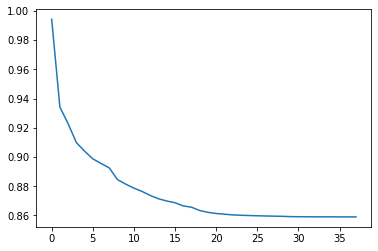


variable: trtbps
bins result: 94~100, 101~106, 108~142, 144~200, 
reduction each round: 0.015513273285578721, 0.01202654357152122, 0.009153940250249626, 


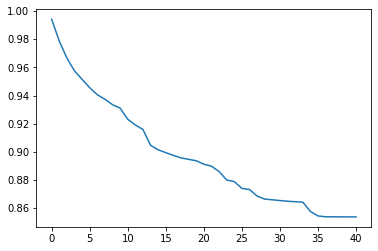


variable: chol
bins result: 126~244, 245~245, 246~409, 417~564, 
reduction each round: 0.017492526290564414, 0.007467277184691867, 0.007006984641160341, 


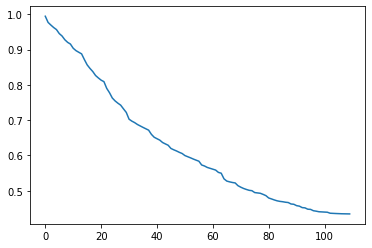


variable: thalachh
bins result: 71~113, 114~147, 148~169, 170~202, 
reduction each round: 0.12965186453697608, 0.017678778871076828, 0.011612911599453768, 


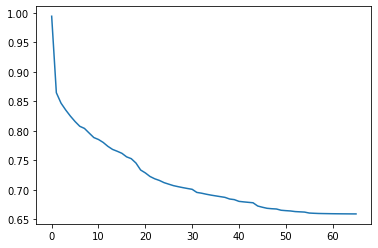


variable: oldpeak
bins result: 0.0~0.7, 0.8~1.6, 1.8~2.4, 2.5~6.2, 
reduction each round: 0.12396651297120331, 0.034483508900708726, 0.010917376341000984, 


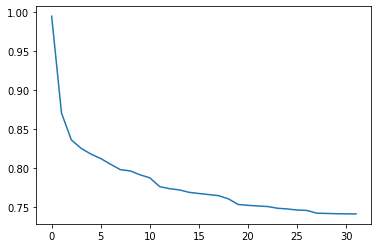

In [ ]:
heart = pd.read_csv("sample_data/heart.csv")
for variable in ["age","trtbps","chol","thalachh","oldpeak"]:
  print("variable:", variable)
  part_LeafNodes, part_entropy_list, LeafNodes, entropy_list = cal_entropy(heart,variable)

  print("bins result: ",end="")
  print_result(part_LeafNodes)
  print("reduction each round: ",end="")
  reduction_list = []
  for i in range(len(part_entropy_list)-1):
    reduction = part_entropy_list[i]-part_entropy_list[i+1]
    reduction_list.append(reduction)
    print(reduction,end=", ")
  print("")

  plt.plot([x for x in range(len(entropy_list))], entropy_list)
  plt.show()
  print("")

  bin_dict = get_bin(part_LeafNodes)
  # print(bin_dict)
  heart[variable] = heart[variable].apply(map_func,args=(bin_dict,))

heart.to_csv("sample_data/heart_entropy.csv")

In [ ]:
heart_entropy = pd.read_csv("sample_data/heart_entropy.csv",index_col="Unnamed: 0")
print(heart_entropy.head())

     age  sex  cp   trtbps     chol  fbs  restecg thalachh  exng  oldpeak  \
0  55~70    1   3  144~200  126~244    1        0  148~169     0  1.8~2.4   
1  29~54    1   2  108~142  246~409    0        1  170~202     0  2.5~6.2   
2  29~54    0   1  108~142  126~244    0        0  170~202     0  0.8~1.6   
3  55~70    1   1  108~142  126~244    0        1  170~202     0  0.8~1.6   
4  55~70    0   0  108~142  246~409    0        1  148~169     1  0.0~0.7   

   slp  caa  thall  output  
0    0    0      1       1  
1    0    0      2       1  
2    2    0      2       1  
3    2    0      2       1  
4    2    0      2       1  
